In [74]:
import numpy as np
from typing import *
import random
from scipy.stats import truncnorm
import matplotlib.pyplot as plt

Fontconfig warning: ignoring UTF-8: not a valid region tag


In [65]:
def generate_random_sample_uniform(sample_size: int, low: int, high: int) -> List[int]:
    return list(np.random.randint(low=low, high=high, size=sample_size))

In [66]:
def get_truncated_normal(mean: float=0, std: float=1, low: int=0, high: int=10000):
    return truncnorm((low - mean) / std, (high - mean) / std, loc=mean, scale=std)

In [67]:
def generate_random_sample_normal(sample_size: int, low: int, high: int, standard_deviation) -> List[int]:
    return get_truncated_normal(mean=(low + high) / 2, std=standard_deviation, low=low, high=high).rvs(sample_size)

In [68]:
def divide_sample(sample: List[int], partition_percentage: int) -> Tuple[List[int], List[int]]:
    random.shuffle(sample)
    partition_index = (len(sample) * partition_percentage) // 100
    if partition_index >= len(sample):
        raise ValueError("Partition percentage can not be more than 100")
    return sample[:partition_index], sample[partition_index:]

In [69]:
def calculate_pxx_naive(sample: List[int], percentile: int) -> int:
    sample.sort()
    target_index = (len(sample) * percentile) // 100
    if target_index >= len(sample):
        raise ValueError("Percentile value can not be more than 100")
    return sample[target_index]

In [78]:
# Generate a sample of 100000 points between 1, 10000, take 5% of it in small, and rest in large list

small, large = divide_sample(generate_random_sample_normal(100000, 1, 10000, 1000), 5)



(array([  13.,   84.,  328.,  784., 1323., 1236.,  833.,  315.,   74.,
          10.]),
 array([1529.84985939, 2226.86732857, 2923.88479774, 3620.90226692,
        4317.9197361 , 5014.93720528, 5711.95467445, 6408.97214363,
        7105.98961281, 7803.00708199, 8500.02455116]),
 <BarContainer object of 10 artists>)

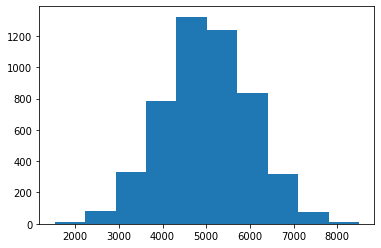

In [79]:
plt.hist(small)


(array([1.8000e+01, 3.3100e+02, 3.1280e+03, 1.3431e+04, 2.8687e+04,
        3.0024e+04, 1.5044e+04, 3.8240e+03, 4.9000e+02, 2.3000e+01]),
 array([ 594.85833773, 1466.39883245, 2337.93932718, 3209.4798219 ,
        4081.02031662, 4952.56081135, 5824.10130607, 6695.64180079,
        7567.18229552, 8438.72279024, 9310.26328497]),
 <BarContainer object of 10 artists>)

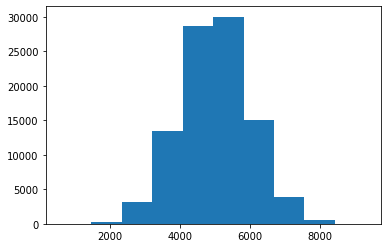

In [80]:
plt.hist(large)


In [81]:
print(f'p99 of small sample: {calculate_pxx_naive(small, 99)} and large sample: {calculate_pxx_naive(large, 99)}')

p99 of small sample: 7292.180796780254 and large sample: 7335.001026032647
